Text(0.5, 1.0, 'Reconstructed Image')

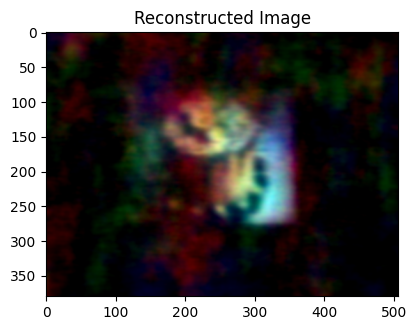

In [32]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# idx = 1 (leaves)
recon_fp = "/home/bezzam/LenslessPiCam/outputs/2024-02-27/16-13-26/digicam_recon.png"
lensed_fp = "/home/bezzam/LenslessPiCam/outputs/2024-02-27/16-13-26/digicam_lensed.png"

# idx = 2 (cake)
recon_fp = "/home/bezzam/LenslessPiCam/outputs/2024-02-27/16-38-07/digicam_recon.png"
lensed_fp = "/home/bezzam/LenslessPiCam/outputs/2024-02-27/16-38-07/digicam_lensed.png"


recon = np.array(Image.open(recon_fp))
lensed = np.array(Image.open(lensed_fp))

# plot the images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(recon)
plt.title('Reconstructed Image')
# plt.axis('off')


1.3333333333333333


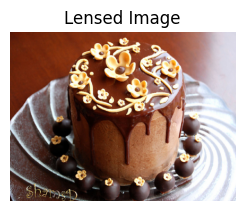

In [33]:
# load the lensed image
plt.subplot(1, 2, 2)
plt.imshow(lensed)
plt.title('Lensed Image')
plt.axis('off')

original_aspect_ratio = lensed.shape[1] / lensed.shape[0]
print(original_aspect_ratio)

(200, 266, 3) (200, 266, 3)


(-0.5, 265.5, 199.5, -0.5)

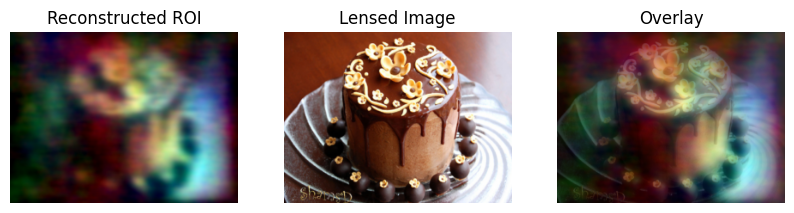

In [37]:
from lensless.utils.image import resize


top_right = (80, 100)
height = 200

# derive width from height and original aspect ratio
width = int(height * original_aspect_ratio)

# plot extracted reconstruction
recon_roi = recon[top_right[0]:top_right[0] + height, top_right[1]:top_right[1] + width]

# resize lensed image to match the size of the reconstructed roi
lensed_re = resize(lensed, shape=recon_roi.shape)

print(recon_roi.shape, lensed_re.shape)

# plot roi, lensed, and overlay
_, ax = plt.subplots(ncols=3, nrows=1, figsize=(10, 5))
ax[0].imshow(recon_roi)
ax[0].set_title('Reconstructed ROI')
ax[0].axis('off')
ax[1].imshow(lensed_re)
ax[1].set_title('Lensed Image')
ax[1].axis('off')
ax[2].imshow(recon_roi, alpha=1)
ax[2].imshow(lensed_re, alpha=0.2)
ax[2].set_title('Overlay')
ax[2].axis('off')